![](img/Slide_01.svg)

![](img/Slide_02.svg)

![](img/Slide_03.svg)

![](img/Slide_04.svg)

![](img/Slide_05.svg)

### Series and Dataframes

In [ ]:
python_list = [1, 2, 3, 4]

python_list[2]

In [ ]:
python_list[1:-1]

In [ ]:
python_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}

python_dict['c']

#### Series: one dimensional labeled array

In [ ]:
import pandas

In [ ]:
serie = pandas.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
serie

In [ ]:
serie[1:-1]

In [ ]:
serie['c']

In [ ]:
serie = serie + 1
serie

In [ ]:
serie + pandas.Series([100, 100, 200, 200], index=['c', 'd', 'a', 'b'])

In [ ]:
serie = pandas.Series([10, 30, 45, 110], index=['a', 'b', 'c', 'd'])
serie

In [ ]:
serie.count()

In [ ]:
serie.mean()

In [ ]:
serie.median()

In [ ]:
serie.std()

In [ ]:
serie

In [ ]:
serie.values

In [ ]:
type(serie.values)

#### Dataframe: two dimensional labeled data structure with columns of potentially different types

In [ ]:
df = pandas.DataFrame({'name': ['John', 'Peter', 'David', 'Michael'],
                       'id': serie,
                       'birthdate': ['2010-01-02', float('NaN'),
                                     '2011-05-23', 0.]})
df

In [ ]:
df.shape

### Indexing

#### By position

In [ ]:
df.iloc[2]

In [ ]:
df.iloc[2]['name']

#### By label

In [ ]:
df

In [ ]:
df.loc['b']

#### Boolean indexing

In [ ]:
df

In [ ]:
df[df['name'] == 'Michael']

In [ ]:
df.query('id > 20 and id < 100')

![](img/Slide_06.svg)

![](img/Slide_07.svg)

<table class="colwidths-given docutils" border="1">
<colgroup>
<col width="12%">
<col width="40%">
<col width="24%">
<col width="24%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Format Type</th>
<th class="head">Data Description</th>
<th class="head">Reader</th>
<th class="head">Writer</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></td>
<td><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></td>
<td><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td><a class="reference external" href="https://www.json.org/">JSON</a></td>
<td><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></td>
<td><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></td>
</tr>
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></td>
<td><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></td>
<td><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></td>
<td><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></td>
<td><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></td>
<td><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></td>
<td><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></td>
</tr>
<tr class="row-even"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></td>
</tr>
<tr class="row-odd"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></td>
</tr>
</tbody>
</table>

Some useful parameters of *read_csv()* function:

- *filepath_or_buffer*: required. Any valid string path is acceptable. The string could be a URL.
- *parse_dates*: columns to be parsed as dates.
- *date_parser*: function used to parsing dates.
- *usecols*: return a subset of the columns.
- *dtype*: data type for data or columns.
- *na_values*: additional strings to recognize as NA/NaN.

Example: 

### *Housing global price indices*. 


- Dataset comes from [Bank For International Settlements BIS](http://www.bis.org/statistics/pp.htm).

In [ ]:
df = pandas.read_csv('data/housing_global_price_indices.csv.gz',
                     parse_dates=['date'])

![](img/Slide_08.svg)

#### Now we go back to the dataset example...

In [ ]:
df.shape

In [ ]:
df.sample(5, random_state=45)

In [ ]:
df[df['price_index'].isnull()].head()

In [ ]:
df['price_index'].isnull().value_counts(normalize=True)

In [ ]:
df_clean = df.dropna()
df_clean.shape

In [ ]:
df_clean = df.fillna(0)
df_clean.head()

#### Other ideas:

- Fill missing values using the mean, median, mode by year for each country.

- Linear regression model.

### Typical operations

In [ ]:
df = df.dropna().reset_index(drop=True)
df.describe()

In [ ]:
df['country'].value_counts()[:5]

In [ ]:
df.sample(5)

In [ ]:
top_10_price_index = df.sort_values('price_index', ascending=False)[:10]
top_10_price_index

#### Apply / map

In [ ]:
def get_price_category(price):
    if price > 150:
        return 'EXPENSIVE'
    elif price < 50:
        return 'CHEAP'
    else:
        return 'REGULAR'

In [ ]:
df['category'] = df['price_index'].map(
                     lambda price: get_price_category(price))

df.sample(5, random_state=45)

#### Group by

In [ ]:
df.sample(5)

In [ ]:
df_gb = df.groupby(df['date'].dt.year)

In [ ]:
price_stats_by_year = df_gb['price_index'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
price_stats_by_year.head()

In [ ]:
def normalize(serie):
    return serie.mean() - serie.std()

In [ ]:
price_norm_by_year = df_gb['price_index'].agg(normalize).to_frame()

price_norm_by_year.rename(columns={'price_index': 'norm_price_index'},
                          inplace=True)

price_norm_by_year.head(10)

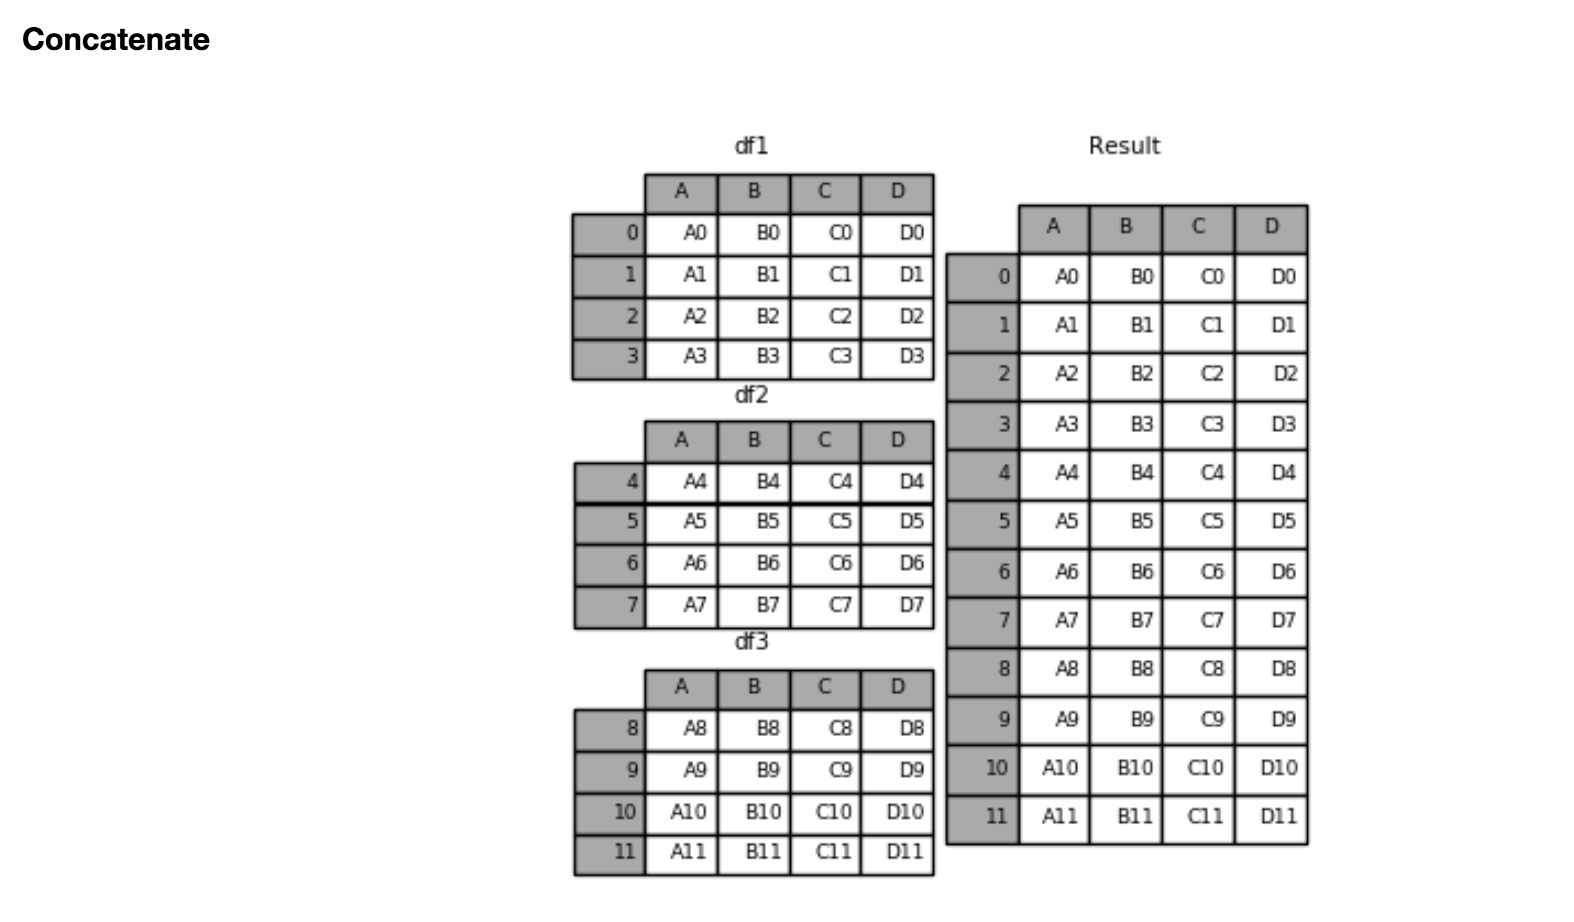

### Merge

In [ ]:
df.head()

In [ ]:
price_norm_by_year.head()

In [ ]:
df = df.merge(price_norm_by_year, how='left', left_on=df.date.dt.year, right_index=True)

df.sample(5)

#### Stack / unstack

#### Pivot tables

### Plots

### Performance tips